# Feature Selection method

###### Top reasons to use feature selection are:

- It enables the machine learning algorithm to train faster.
- It reduces the complexity of a model and makes it easier to interpret.
- It improves the accuracy of a model if the right subset is chosen.
- It reduces overfitting.

## Filter method

The filter method ranks each feature based on some uni-variate metric and then selects the highest-ranking features.


###### Advantages of Filter methods
1. Filter methods are model agnostic(compatible)
2. Rely entirely on features in the data set
3. Computationally very fast
4. Based on different statistical methods

In [9]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier


In [10]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [11]:
df = pd.read_csv("C:/Users/Soeum Zerayha/Downloads/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
data = df[['volatile acidity','citric acid','free sulfur dioxide','density','pH','sulphates','alcohol']].copy()
data.head()

,volatile acidity,citric acid,free sulfur dioxide,density,pH,sulphates,alcohol
0,0.70,0.00,11.0,0.9978,3.51,0.56,9.4
1,0.88,0.00,25.0,0.9968,3.20,0.68,9.8
2,0.76,0.04,15.0,0.9970,3.26,0.65,9.8
3,0.28,0.56,17.0,0.9980,3.16,0.58,9.8
4,0.70,0.00,11.0,0.9978,3.51,0.56,9.4


In [14]:
x = data.copy()
y =  df['quality']

In [15]:
x.shape, y.shape

((1599, 7), (1599,))

In [43]:
data.shape

(1599, 7)

Remove Constant Features


In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state =0)

In [53]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)

#Fit and transforming on train data
data_constant = constant_filter.fit_transform(x_train)
print(data_constant.shape)

#Extracting all constant columns using get support function of our filter
constant_columns = [column for column in x_train.columns
                    if column not in x_train.columns[constant_filter.get_support()]]

#No. of constant columns
print(len(constant_columns))

#Constant columns names:
for column in constant_columns:
    print(column)

(1279, 7)
0


In [54]:
data_qcons = data.drop(qcons_columns,axis=1)
data_qcons.shape

(1599, 6)

In [51]:
qcons_filter = VarianceThreshold(threshold=0.01)

#Fit and transforming on train data
data_qcons = qcons_filter.fit_transform(x_train)
print(data_qcons.shape)

#Extracting all Quasi constant columns using get support function of our filter
qcons_columns = [column for column in x_train.columns
                    if column not in x_train.columns[qcons_filter.get_support()]]

#No. of Quasi constant columns
print(len(qcons_columns))

#Quasi Constant columns names:
for column in qcons_columns:
    print(column)




(1279, 6)
1
density


In [52]:
data_qcons = data.drop(qcons_columns,axis=1)
data_qcons.shape

(1599, 6)

In [55]:
#Transposing our “quasi-constant” modified dataset.
data_qcons_t = data_qcons.T
data_qcons_t.shape

(6, 1599)

In [56]:
#Print Duplicate Features
print(data_qcons_t.duplicated().sum())

0


In [17]:
from sklearn.feature_selection import chi2
f_score = chi2(x_train, y_train)

In [18]:
f_score

(array([1.38742441e+01, 1.16214771e+01, 1.28558339e+02, 1.90646114e-04,
        1.33332010e-01, 4.00382812e+00, 3.70936879e+01]),
 array([1.64282786e-02, 4.03591247e-02, 4.81365667e-26, 1.00000000e+00,
        9.99670733e-01, 5.48864926e-01, 5.73595999e-07]))

In [19]:
p_values = pd.Series(f_score[1], index = x_train.columns)
p_values.sort_values(ascending = True, inplace = True)

In [20]:
p_values

free sulfur dioxide    4.813657e-26
alcohol                5.735960e-07
volatile acidity       1.642828e-02
citric acid            4.035912e-02
sulphates              5.488649e-01
pH                     9.996707e-01
density                1.000000e+00
dtype: float64

<AxesSubplot:>

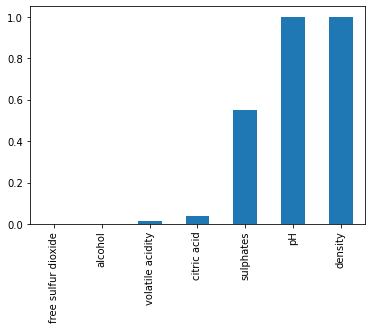

In [21]:
p_values.plot.bar()

In [36]:

print('RandomForestClassifier')
print('')
print('============')
model = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = model.score(x_train, y_train)
print('Training Score:', score)
score = model.score(x_test, y_test)
print('Testing Score:', score)

score_rfc = score

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))
print("=======================================================================")
print("RandomForestClassifier! Accuaracy = ", score)
print("=======================================================================")
  

RandomForestClassifier

Training Score: 1.0
Testing Score: 0.7
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.74      0.81      0.77       135
           6       0.72      0.72      0.72       142
           7       0.44      0.44      0.44        27
           8       0.00      0.00      0.00         3

    accuracy                           0.70       320
   macro avg       0.32      0.33      0.32       320
weighted avg       0.67      0.70      0.68       320

RandomForestClassifier! Accuaracy =  0.7


C:\Users\Soeum Zerayha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Soeum Zerayha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Soeum Zerayha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
pip install mlxtend  

Note: you may need to restart the kernel to use updated packages.


## Wrapper Method


In [59]:
from sklearn.neighbors import KNeighborsClassifier

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

#Forward Selection

knn = KNeighborsClassifier(n_neighbors=3)

efs1 = EFS(knn, 
           min_features=1,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(x, y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)


Features: 98/98

Best accuracy score: 0.50
Best subset (indices): (1, 4, 5, 6)
Best subset (corresponding names): ('citric acid', 'pH', 'sulphates', 'alcohol')


In [74]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

knn = KNeighborsClassifier(n_neighbors=4)
sfs1 = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.4s finished

[2022-05-24 20:50:10] Features: 1/3 -- score: 0.5622263914946842[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s finished

[2022-05-24 20:50:10] Features: 2/3 -- score: 0.7066916823014384[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished

[2022-05-24 20:50:11] Features: 3/3 -- score: 0.7273295809881176

In [75]:
sfs1.subsets_

{1: {'feature_idx': (3,),
  'cv_scores': array([0.56222639]),
  'avg_score': 0.5622263914946842,
  'feature_names': ('density',)},
 2: {'feature_idx': (3, 6),
  'cv_scores': array([0.70669168]),
  'avg_score': 0.7066916823014384,
  'feature_names': ('density', 'alcohol')},
 3: {'feature_idx': (0, 3, 6),
  'cv_scores': array([0.72732958]),
  'avg_score': 0.7273295809881176,
  'feature_names': ('volatile acidity', 'density', 'alcohol')}}

In [76]:
sfs1.k_score_

0.7273295809881176

In [81]:
# Sequential Backward Selection
sbs = SFS(knn, 
          k_features=3, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=-1)
sbs = sbs.fit(x, y)

print('\nSequential Backward Selection (k=3):')
print(sbs.k_feature_idx_)
print('CV Score:')
print(sbs.k_score_)


Sequential Backward Selection (k=3):
(0, 3, 6)
CV Score:
0.522218045112782
